<a href="https://colab.research.google.com/github/sdariza/MLP-Weather-Prediction/blob/master/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install iris-grib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 112.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.1/518.1 kB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 123.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 101.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!wget 'https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/air.2023.nc'

--2023-06-08 13:33:04--  https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/air.2023.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132664525 (127M) [application/x-netcdf]
Saving to: ‘air.2023.nc’

air.2023.nc         100%[===================>] 126.52M  22.6MB/s    in 6.4s    

2023-06-08 13:33:11 (19.9 MB/s) - ‘air.2023.nc’ saved [132664525/132664525]



# Iris

In [22]:
import iris
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [23]:
cube = iris.load_cube('air.2023.nc')
cube

<iris 'Cube' of air_temperature / (degK) (time: 604; Level: 17; latitude: 73; longitude: 144)>

In [24]:
lons = cube.coord('longitude').points
lons

array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
        22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
        45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
        67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,
        90. ,  92.5,  95. ,  97.5, 100. , 102.5, 105. , 107.5, 110. ,
       112.5, 115. , 117.5, 120. , 122.5, 125. , 127.5, 130. , 132.5,
       135. , 137.5, 140. , 142.5, 145. , 147.5, 150. , 152.5, 155. ,
       157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5, 175. , 177.5,
       180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5, 200. ,
       202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. ,
       247.5, 250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5,
       270. , 272.5, 275. , 277.5, 280. , 282.5, 285. , 287.5, 290. ,
       292.5, 295. , 297.5, 300. , 302.5, 305. , 307.5, 310. , 312.5,
       315. , 317.5,

In [25]:
lon_dim = len(lons)
m = lon_dim//2
for lon in lons:
  print(f'meridiano:{lon} | antimeridiano:{lons[(m + np.where(lons == lon)[0])%lon_dim][0]}')

meridiano:0.0 | antimeridiano:180.0
meridiano:2.5 | antimeridiano:182.5
meridiano:5.0 | antimeridiano:185.0
meridiano:7.5 | antimeridiano:187.5
meridiano:10.0 | antimeridiano:190.0
meridiano:12.5 | antimeridiano:192.5
meridiano:15.0 | antimeridiano:195.0
meridiano:17.5 | antimeridiano:197.5
meridiano:20.0 | antimeridiano:200.0
meridiano:22.5 | antimeridiano:202.5
meridiano:25.0 | antimeridiano:205.0
meridiano:27.5 | antimeridiano:207.5
meridiano:30.0 | antimeridiano:210.0
meridiano:32.5 | antimeridiano:212.5
meridiano:35.0 | antimeridiano:215.0
meridiano:37.5 | antimeridiano:217.5
meridiano:40.0 | antimeridiano:220.0
meridiano:42.5 | antimeridiano:222.5
meridiano:45.0 | antimeridiano:225.0
meridiano:47.5 | antimeridiano:227.5
meridiano:50.0 | antimeridiano:230.0
meridiano:52.5 | antimeridiano:232.5
meridiano:55.0 | antimeridiano:235.0
meridiano:57.5 | antimeridiano:237.5
meridiano:60.0 | antimeridiano:240.0
meridiano:62.5 | antimeridiano:242.5
meridiano:65.0 | antimeridiano:245.0
merid

In [ ]:
iris.Constraint?

In [ ]:
query = iris.Constraint(Level = lambda cell : cell ==1000,
                        time = lambda cell : cell.point.hour == 0,
                        coord_values={'latitude': lambda cell : cell in [90, 87.5],
                                      'longitude': lambda cell: cell in [357.5, 0, 2.5]}
                        )
H0 = cube.extract(query)
H0

<iris 'Cube' of air_temperature / (degK) (time: 151; latitude: 2; longitude: 3)>

In [ ]:
H0.coord('latitude').points

array([90. , 87.5], dtype=float32)

In [ ]:
H0.coord('longitude').points

array([  0. ,   2.5, 357.5], dtype=float32)

In [ ]:
query = iris.Constraint(Level = lambda cell : cell ==1000,
                        time = lambda cell : cell.point.hour == 6,
                        coord_values={'latitude': lambda cell : cell in [90],
                                      'longitude': lambda cell: cell in [0]}
                        )
H6 = cube.extract(query)
H6

Air Temperature (degK),time
Shape,151
Dimension coordinates,
time,x
Scalar coordinates,
Level,1000.0 millibar
latitude,90.0 degrees
longitude,0.0 degrees
Attributes,
Conventions,'CF-1.0'
GRIB_id,11


In [ ]:
X = H0.data.data
y = H6.data.data

In [ ]:
y.shape

(151,)

In [ ]:
df = pd.DataFrame(np.reshape(X,newshape=(len(X), 3*2)), columns = [f'x{i}' for i in range(6)])
df['y'] = y
df

,x0,x1,x2,x3,x4,x5,y
0,250.000000,250.000000,250.000000,257.100006,257.200012,256.899994,249.000000
1,250.000000,250.000000,250.000000,253.600006,253.800003,253.400009,250.199997
2,252.399994,252.399994,252.399994,256.299988,256.500000,256.100006,251.900009
3,253.899994,253.899994,253.899994,259.000000,258.899994,259.000000,254.699997
4,260.000000,260.000000,260.000000,262.899994,262.899994,263.000000,260.399994
...,...,...,...,...,...,...,...
146,266.100006,266.100006,266.100006,263.399994,263.399994,263.500000,265.899994
147,264.299988,264.299988,264.299988,265.199982,265.100006,265.399994,265.300018
148,267.100006,267.100006,267.100006,268.699982,268.600006,268.799988,268.000000
149,270.299988,270.299988,270.299988,268.199982,268.100006,268.299988,270.200012


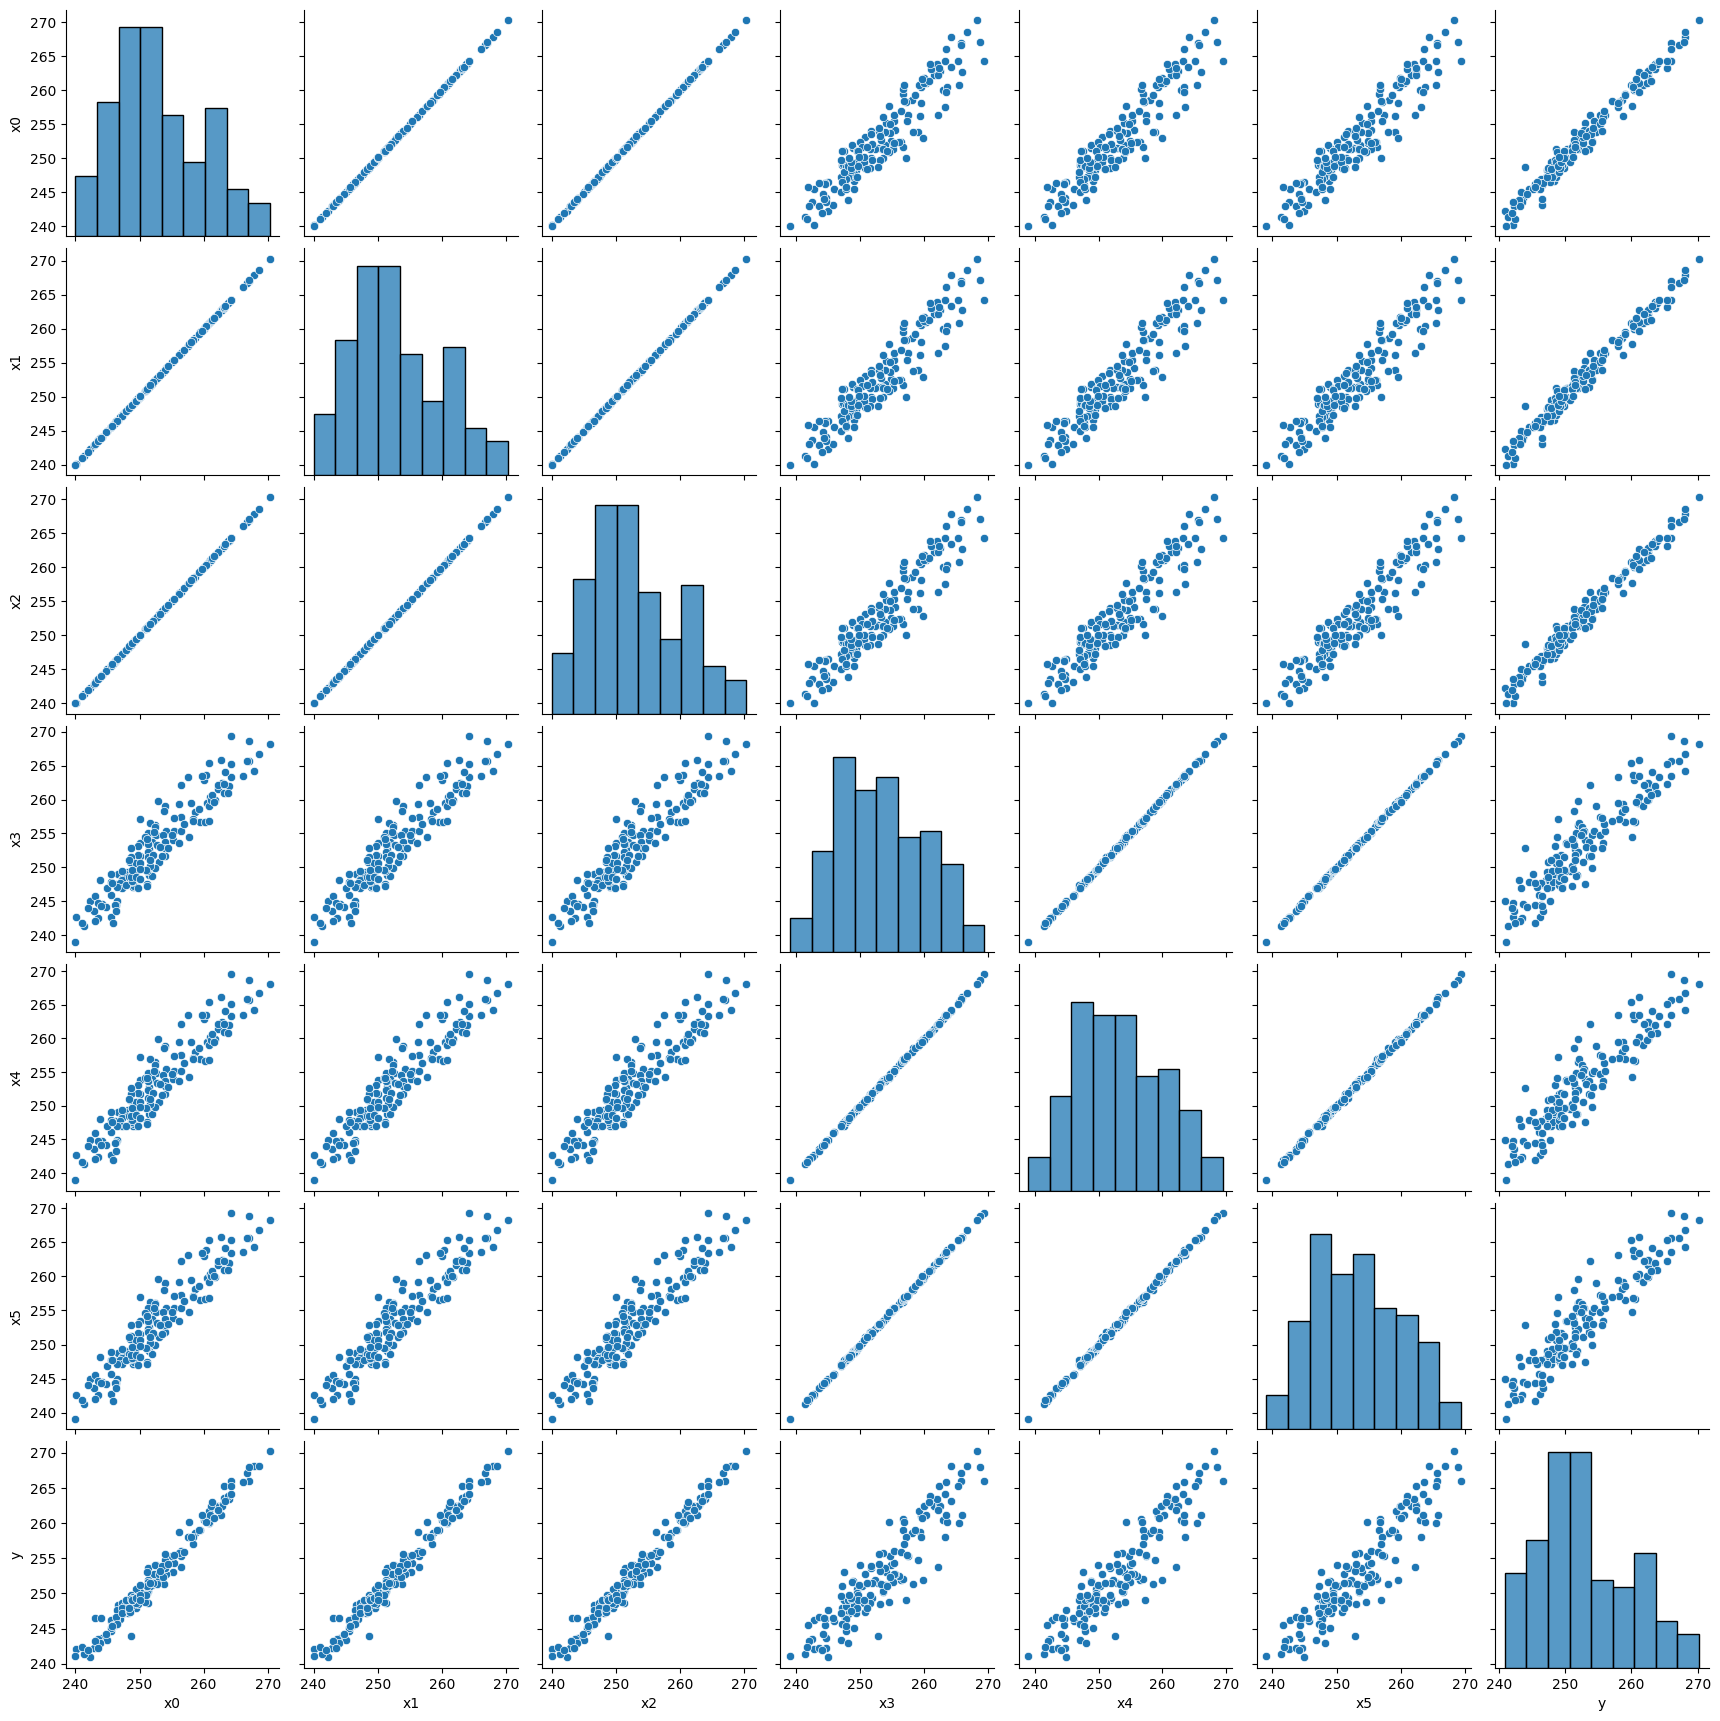

In [ ]:
sns.pairplot(df)

<Axes: >

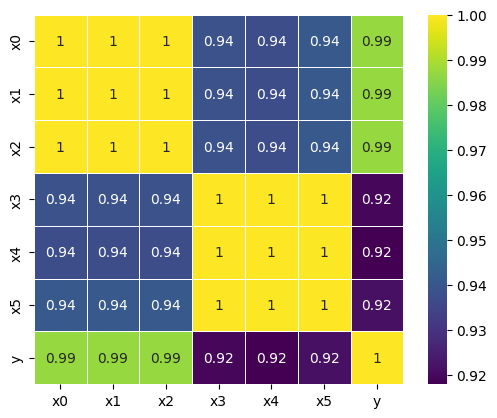

In [ ]:
sns.heatmap(df.corr(), square=True, linewidths=.5, annot=True, cmap='viridis')

In [ ]:
X = df.drop(columns=['y']).to_numpy()
y = df['y'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123, train_size=.1)

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(7),max_iter=300, solver='adam' ,verbose=True, random_state=123, early_stopping=True)

In [ ]:
model.fit(X=X_train, y=y_train)

Iteration 1, loss = 40884.19142590
Validation score: -936.519157
Iteration 2, loss = 40310.38283210
Validation score: -923.255920
Iteration 3, loss = 39738.96486331
Validation score: -910.050233
Iteration 4, loss = 39170.03517577
Validation score: -896.903758
Iteration 5, loss = 38603.66017573
Validation score: -883.817834
Iteration 6, loss = 38039.91017568
Validation score: -870.794907
Iteration 7, loss = 37478.87111314
Validation score: -857.835991
Iteration 8, loss = 36920.60939435
Validation score: -844.943072
Iteration 9, loss = 36365.19142556
Validation score: -832.117672
Iteration 10, loss = 35812.69533176
Validation score: -819.361453
Iteration 11, loss = 35263.18751922
Validation score: -806.675799
Iteration 12, loss = 34716.73439418
Validation score: -794.062395
Iteration 13, loss = 34173.39845664
Validation score: -781.522672
Iteration 14, loss = 33633.24611285
Validation score: -769.057967
Iteration 15, loss = 33096.33595656
Validation score: -756.669874
Iteration 16, loss 

MLPRegressor(early_stopping=True, hidden_layer_sizes=7, max_iter=300,
             random_state=123, verbose=True)

In [ ]:
print(f'MAE: {mean_absolute_error(y_test, model.predict(X_test))}')

MAE: 1.4026124477386475


In [ ]:
print(f'MAPE: {mean_absolute_percentage_error(y_test, model.predict(X_test))}')

MAPE: 0.00554994959384203


In [ ]:
U, S, VT = np.linalg.svd(a=X_train, full_matrices=False)

In [ ]:
S[0] / S.sum()

0.99557227